# Notebook 6

## Integración 

#### Python 🐍

> Dr. Ricardo Méndez Fragoso $\mathbb{R} i \vec c \hbar$

La integral numérica es el siguiente paso natural en las herramientas de cálculo numérico. La forma típica de hacer una integración numérica es interpolar con el teorema de Taylor, o alguna otra técnica parecida, los puntos interiores en la malla numérica con la finalidad de hacer integrales analíticas de dichas secciones. Si se usa el teorema de Taylor, como en las [notas del curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/), la interpolación es por medio de polinomios y la integral queda en términos de los puntos $\{x_i,f(x_i) = f_i\}$. Las bibliotecas que usaremos en este notebook son:

In [ ]:
from pylab import *
import time

## Algoritmo 1

De acuerdo con las [notas del curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/), un primer algoritmo es que $\int _{x_0} ^{x_N} f(x) dx = \int _{x_0} ^{x_0 + h/2} f(x)dx + \sum _{i=1} ^{N-1} \int _{x_i - h/2} ^{x_i + h/2} f(x)dx + \int _{x_N - h/2} ^{x_N} f(x)dx$. Para los puntos interiores en la malla se tiene que el cálculo se debe hacer con la siguiente relación:

$$
\int_{x_i - \frac{h}{2}} ^{x_i + \frac{h}{2}} f(x)dx = \frac{f_{i+1}+22f_i+f_{i-1}}{24}h
$$

Para los puntos extremos se tiene que:

$$
\int _{x_0} ^{x_0 + \frac{h}{2}} f(x)dx = \frac{h}{48} (17 f_0 + 7 f_1 + f_2 - f_3)
$$

y

$$
\int _{x_N - \frac{h}{2} } ^{x_N} f(x)dx = \frac{h}{48} (17 f_N + 7 f_{N-1} + f_{N-2} - f_{N-3})
$$

A continuación veamos la implementación de dicho algoritmo con la integral $\int _0 ^{\pi} \sin (x) dx = 2$. La gráfica de la función en dicho intervalo es:

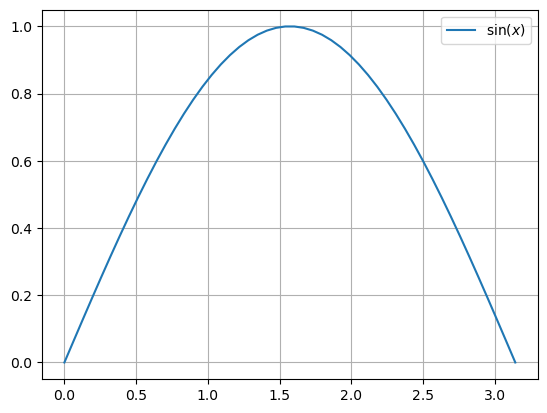

In [ ]:
x = linspace(0,pi)
y = sin(x)
plot(x,y,label="$\sin (x)$")
grid(),legend()
show()

Con la siguiente función se hace la programación del algoritmo anterior.

In [ ]:
def int_alg1(x,y):
    integral = 0
    h = x[1] -x[0]
    for i in range(1,len(y)-1):
        integral +=  y[i+1] + 22*y[i] + y[i-1]
    integral += 0.5*( 17*y[0] + 7*y[1] + y[2] - y[3] ) # lado izq
    integral += 0.5*( 17*y[-1] + 7*y[-2] + y[-3] - y[-4] ) # lado der
    return integral*(h/24)

In [ ]:
x = linspace(0,pi)
y = sin(x)
print(int_alg1(x,y))

2.0000015908803026


Como se puede observar, el resultado es muy cercano a 2

## Algoritmo 2

En las [notas del curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/) también viene un segundo algoritmo que calcula la integral numérica pero utilizando en intervalo de validez completo para cada $x_i$ en el intervalo $[ x_i -h,x_i +h ]$. Este algoritmo tiene la ventaja de que realiza menos operaciones, ya que únicamente utiliza los puntos pares o impares de la malla. De esta manera el algoritmo para los puntos de interés cuando se tiene un número impar de puntos es:

$$
\int _{x_i -h}  ^{x_i +h} f(x) dx = \frac{h}{3} (f_{i+1} + 4f_i + f_{i-1})
$$

En el caso de que se tenga un número par de puntos hay que recorrer el índice de inicio y agregar el punto inicial como se indica en las [notas del curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/):

$$
\int _{x_0} ^{x_0 + h} f(x) dx = \frac{h}{48} (23 f_0 + 26 f_1 -4f_2 + 6f_3 -3f_4 ) 
$$

La siguiente función implementa el algoritmo anterior:

In [ ]:
def int_alg2(x,y):
    integral = 0
    h = x[1] - x[0]
    if mod(len(y),2) == 0:
        inicio = 2
    elif mod(len(y),2) == 1:
        inicio = 1
    for i in range(inicio,len(y)-1,2):
        integral += y[i+1] + 4*y[i] + y[i-1]
    integral = integral*(h/3)
    # punto inicial si se tiene un arreglo par
    if mod(len(y),2) == 0:
        integral += (h/48)*(23*y[0] + 26*y[1] - 4*y[2] + 6*y[3] -3*y[4])
    return integral

A continuación se muestra la utilización de la función anterior con una malla con un número impar y par de puntos para verificar que trabaja correctamente:

In [ ]:
x = linspace(0,pi,49)
print("Número de puntos en la malla: ", len(x))
y = sin(x)
int_alg2(x,y)

Número de puntos en la malla:  49


2.000000203992194

In [ ]:
x = linspace(0,pi,50)
print("Número de puntos en la malla: ", len(x))
y = sin(x)
int_alg2(x,y)

Número de puntos en la malla:  50


2.0000029831024326

Como se puede observar, la precisión es prácticamente la misma independientemente del número de puntos, y también es comparable con la precisión del algoritmo anterior. La única diferencia radica en el punto calculado cuando se tiene un número par de puntos, misma que se puede mejorar ajustando esa línea de código con diferencias finitas a un orden mayor. A continuación mediremos los intervalos de tiempo que le toma a cada uno de los algoritmos para el mismo número de puntos, en este caso 50.

In [ ]:
num_exp = 10000
tiempos = zeros(num_exp)
for i in range(num_exp):
    inicio = time.time()
    int_alg1(x,y)
    fin = time.time()
    tiempos[i] = fin-inicio
print("Tiempo promeido de int_alg1: ",mean(tiempos)*1e6, " micro segundos.")

Tiempo promeido de int_alg1:  38.928937911987305  micro segundos.


In [ ]:
num_exp = 10000
tiempos = zeros(num_exp)
for i in range(num_exp):
    inicio = time.time()
    int_alg2(x,y)
    fin = time.time()
    tiempos[i] = fin-inicio
print("Tiempo promeido de int_alg2: ",mean(tiempos)*1e6, " micro segundos.")

Tiempo promeido de int_alg2:  26.839399337768555  micro segundos.


Como era de esperarse, el segundo algoritmo tarda menos debido a que el cálculo lo realiza para la mitad de puntos en la malla. Existen diferentes algoritmos que calculan la integral numérica de una función, y al igual que con el cálculo de las derivadas, conforme se requiere mayor precisión para un número fijo de puntos, es necesario utilizar más puntos vecinos a $x_i$ y $f_i$ en la malla.

[Regresar a la página del curso.](http://sistemas.fciencias.unam.mx/~rich/FisComp/)

Se agradece el apoyo del proyecto DGAPA-PAPIME:

+ PE 103021 nueva versión durante el año 2022. Versión interactiva en Colab.
+ PE 112919 durante el año 2020. Idea original.